In [5]:
# %matplotlib inline 

import pandas as pd
import numpy as np
import gensim
import logging

# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
import re
# import matplotlib.pyplot as plt
from pathlib import Path

# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [12]:
parent_folder_path = Path().cwd().parent
data_path = parent_folder_path / 'data' / 'app_questions'

In [13]:
df_sentences = pd.read_csv(data_path / 'prep_data' / 'prep_sentences_50K.csv')

C:\Users\slavr\AppData\Local\Temp\ipykernel_17452\689209078.py:1: DtypeWarning: Columns (36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279

In [14]:
df_sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Columns: 1065 entries, 0 to Unnamed: 1064
dtypes: int64(1), object(1064)
memory usage: 406.2+ MB


In [15]:
sentences = df_sentences.values.tolist()

In [23]:
# sg defines the training algorithm. By default (sg=0), CBOW is used. Otherwise (sg=1), skip-gram is employed.

# model = gensim.models.Word2Vec(sentences, min_count=5, workers=4,  vector_size=200, window=20, sg=1)
model = gensim.models.FastText(sentences, min_count=5, workers=4,  vector_size=200, window=20, sg=1)


In [33]:
#retrain model
sent = [['lord', 'of', 'the', 'rings'], ['lord', 'of', 'the', 'semi-groups']]
model.build_vocab(sent, update=True)
model.train(sent, total_examples = len(sent), epochs=5)

(20, 40)

In [37]:
model.wv.most_similar('rings')

[('bearings', 0.8824030756950378),
 ('offerings', 0.8609479665756226),
 ('things', 0.8028083443641663),
 ('fittings', 0.7729979157447815),
 ('savings', 0.7567203044891357),
 ('drawings', 0.7454153299331665),
 ('springs', 0.7010876536369324),
 ('buildings', 0.6798778176307678),
 ('liquids', 0.6648072600364685),
 ('waterproofing', 0.6644697785377502)]

In [34]:
model.wv.get_sentence_vector(['devops'])

array([-7.47248903e-02,  2.08735578e-02,  3.20897959e-02, -1.09292649e-01,
        1.20852306e-01, -8.27104598e-03,  1.23205170e-01, -7.58035034e-02,
       -3.18384022e-02,  1.65514156e-01,  3.04870624e-02,  2.22494286e-02,
        2.70302314e-02,  7.14715272e-02,  3.02897813e-03,  5.40251704e-03,
        5.15303016e-02,  6.49424791e-02,  1.64917745e-02,  5.78496233e-02,
        6.89638183e-02, -5.25714159e-02, -3.51072364e-02,  1.17488980e-01,
        6.64507747e-02,  1.15440890e-01,  1.05258301e-02, -1.39882797e-02,
        1.48441166e-01,  1.65165648e-01, -1.58441558e-01,  1.29027963e-01,
        7.72028714e-02, -8.10430273e-02,  1.38627151e-02,  1.06478773e-01,
       -3.45791169e-02,  7.84712881e-02, -9.67759639e-02,  1.70300168e-03,
        1.33680655e-02,  1.54736787e-02, -4.98587005e-02, -9.03469473e-02,
        2.78472863e-02, -2.75763944e-02, -4.50324593e-03,  3.95537317e-02,
        1.48223108e-02, -1.27064124e-01,  1.02787681e-01,  4.61097099e-02,
       -6.69617206e-02, -

In [13]:
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model.wv[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(10,20))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.05,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

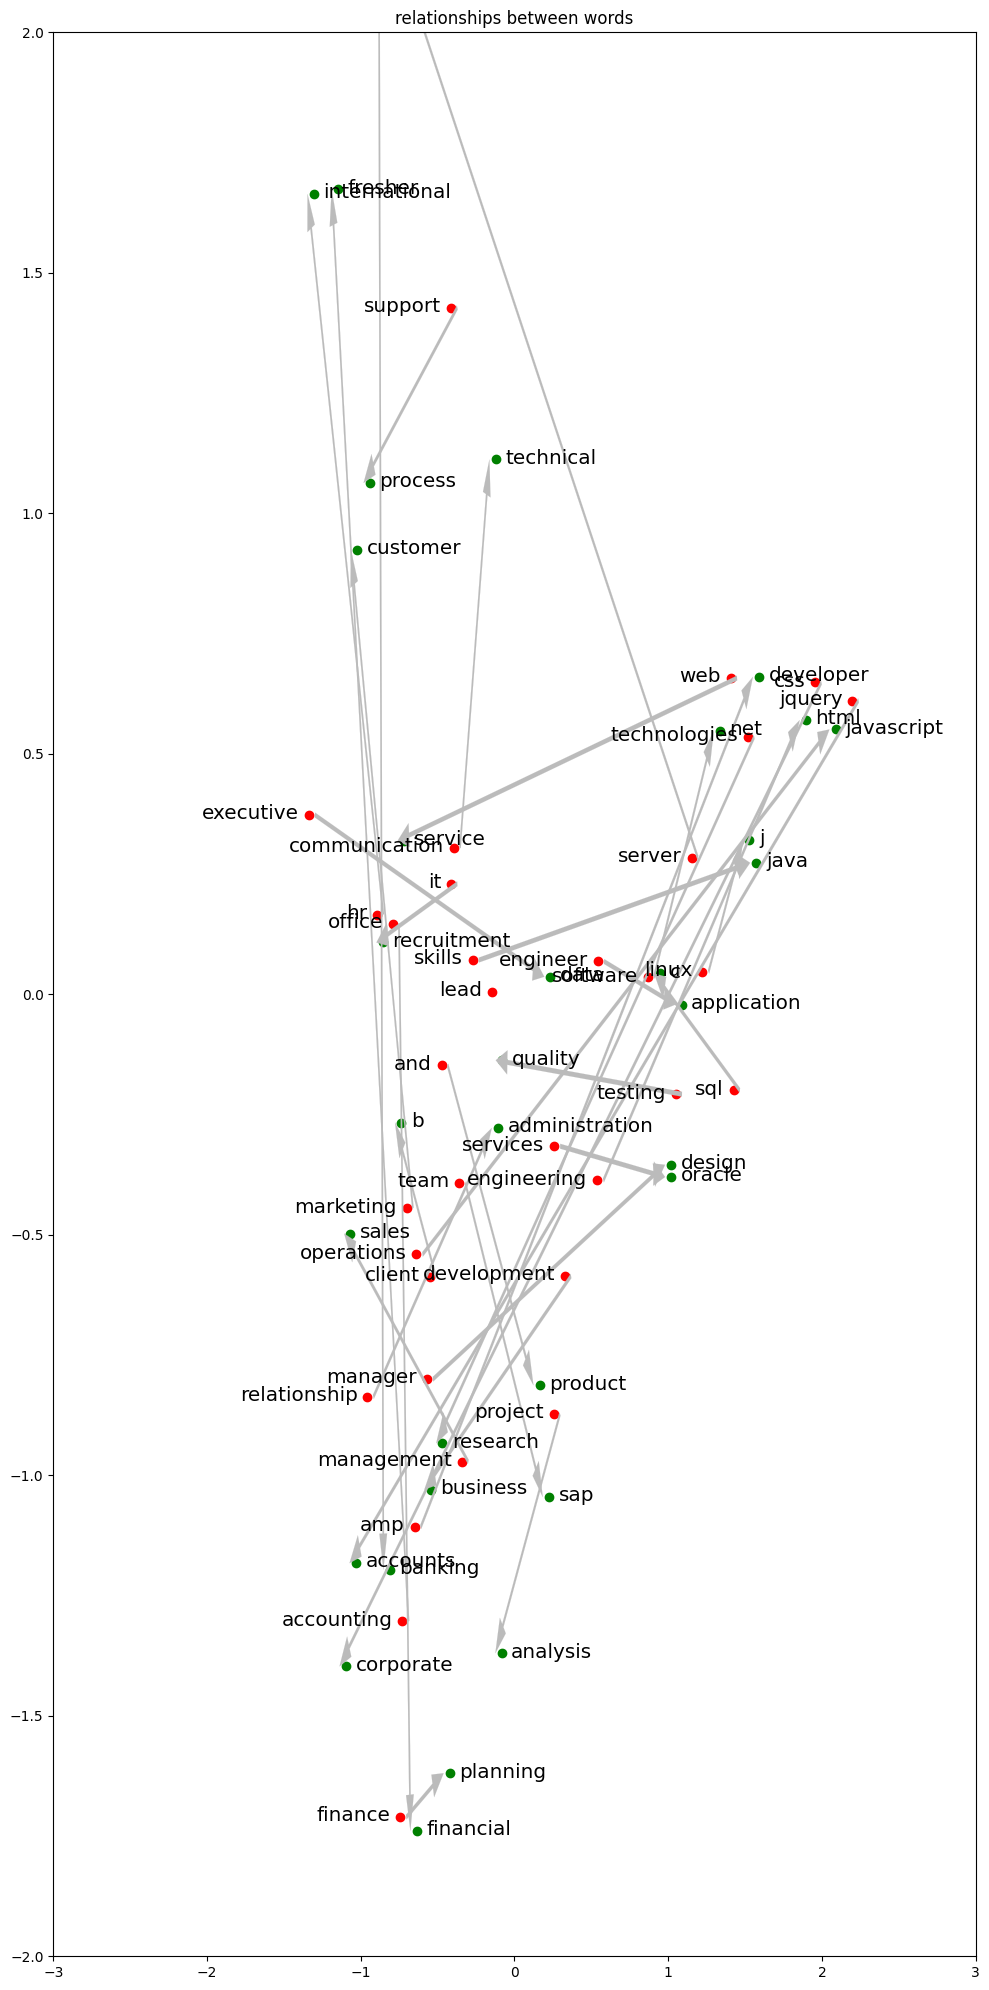

In [14]:
draw_words(model, list(model.wv.key_to_index.keys())[1:70], True, True, True, -3, 3, -2, 2, r'relationships between words')

In [15]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile(parent_folder_path / 'prep_data' / 'models' / "word2vec.model")
# fname = get_tmpfile(parent_folder_path / 'prep_data' / 'models' / "fasttext.model")

model.save(fname )
# model.wv.save_word2vec_format(parent_folder_path / 'prep_data' / 'models' / 'skill2vec50k_word2vec.bin', binary=True)


2023-05-22 13:27:27,195 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-05-22 13:27:27,196 : INFO : built Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...> from 9 documents (total 29 corpus positions)
2023-05-22 13:27:27,197 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...> from 9 documents (total 29 corpus positions)", 'datetime': '2023-05-22T13:27:27.197157', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'created'}
2023-05-22 13:27:27,261 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'd:\\project\\ai_job_autopilot\\gitlab\\prep_data\\models\\word2vec.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-05-22T13:27:27.261657', 'gensim': '4.3.1', 'python': '3.

In [16]:
# model_test = gensim.models.FastText.load(fname)
